Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

Draw plots to demonstrate the analysis for the following questions and better visualizations
Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
response = requests.get(
    "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
)


In [3]:
df = response.json()

In [4]:
episodes = df["_embedded"]["episodes"]

In [5]:
episodes_data = []

In [6]:
for episode in episodes:
    epi_data = {
        "id": episode["id"],
        "name": episode["name"],
        "season": episode["season"],
        "number": episode["number"],
        "rating_average": episode["rating"]["average"],
        "airdate": episode["airdate"],
        "summary": episode["summary"],
    }
    episodes_data.append(epi_data)

In [7]:
episodes_df = pd.DataFrame(episodes_data)

Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

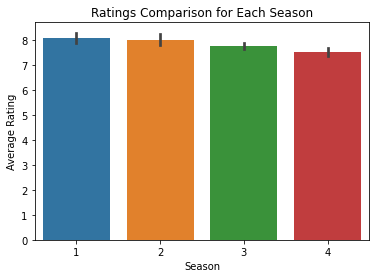

In [8]:

sns.barplot(data=episodes_df, x="season", y="rating_average")
plt.title("Ratings Comparison for Each Season")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.show()

 Get all the episode names with an average rating higher than 8 for every season

In [13]:

high_rated_episodes = episodes_df[episodes_df["rating_average"] > 8]
high_rated_episode_names = high_rated_episodes["name"]
print("Episode names with average rating > 8:")
print(high_rated_episode_names.to_string(index=False))

Episode names with average rating > 8:
            Trompe L'Oeil
The Well-Tempered Clavier
       The Bicameral Mind
                  Kiksuya
          Vanishing Point
            The Passenger


Get all the episode names that aired before May 2019

In [10]:
episodes_df["airdate"] = pd.to_datetime(episodes_df["airdate"])
before_may_2019 = episodes_df[episodes_df["airdate"] < pd.Timestamp("2019-05-01")]
before_may_2019_names = before_may_2019["name"]
print("Episode names aired before May 2019:")
print(before_may_2019_names.to_string(index=False))

Episode names aired before May 2019:
             The Original
                 Chestnut
                The Stray
        Dissonance Theory
              Contrapasso
            The Adversary
            Trompe L'Oeil
              Trace Decay
The Well-Tempered Clavier
       The Bicameral Mind
       Journey Into Night
                  Reunion
          Virtù e Fortuna
 The Riddle of the Sphinx
             Akane No Mai
              Phase Space
             Les Écorchés
                  Kiksuya
          Vanishing Point
            The Passenger


Get the episode name from each season with the highest and lowest rating

In [11]:
highest_rated_episodes = episodes_df.groupby("season")["rating_average"].idxmax()
lowest_rated_episodes = episodes_df.groupby("season")["rating_average"].idxmin()
highest_rated_episode_names = episodes_df.loc[
    highest_rated_episodes, ["season", "name"]
]
lowest_rated_episode_names = episodes_df.loc[lowest_rated_episodes, ["season", "name"]]
print("Episode with the highest rating for each season:")
print(highest_rated_episode_names.to_string(index=False))
print("Episode with the lowest rating for each season:")
print(lowest_rated_episode_names.to_string(index=False))

Episode with the highest rating for each season:
 season               name
      1 The Bicameral Mind
      2            Kiksuya
      3       Parce Domine
      4           Zhuangzi
Episode with the lowest rating for each season:
 season         name
      1    The Stray
      2 Akane No Mai
      3  Decoherence
      4 The Auguries


Get the summary for the most popular ( ratings ) episode in every season

In [12]:
most_popular_episodes = episodes_df.groupby("season")["rating_average"].idxmax()
most_popular_episode_summaries = episodes_df.loc[
    most_popular_episodes, ["season", "summary"]
]
print("Summary for the most popular episode in each season:")
print(most_popular_episode_summaries.to_string(index=False))

Summary for the most popular episode in each season:
 season                                                                                                                                                                                                                 summary
      1 <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
      2                                          <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>
      3                                                                                                                                                       <p>If you're stuck in a loop, try walking in a straight line.</p>
      4                                            